In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

### 6.1 Skewness

<b>Skewness</b> is a statistic that measures the assymetry of a distribution. Sample skewness is defined as:

$$Skewness = \frac{Mean\ Cubed\ Deviation}{Mean\ Squared\ Deviation^{3/2}}$$

Negative skewness means that the distribution skews left and positive skewness means that the distribution is skewed to right. <b>Outliers</b> have a disproportionate effect on skewness.

Another way to evaluate the asymmetry of a distribution is to compare mean and median. For distributions that skews left, mean is less than the median. This statistic is denoted by <b>Pearson's Median Skewness Coefficient</b> which is given as:

$$Pearson's\ Median\ Skewness\ Coefficient = 3\frac{(Mean \ - \ Median)}{\sigma}$$

<b>Exercise 6.1: </b>Compute the skewness for the distributions of pregnancy length and birth weight. Are the results consistent with the shape of the distributions? Compute PearsonSkewness as well and compare the results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

def skewness(x):
    mean = x.mean()
    m2 = np.mean(np.power((x - mean), 2))
    m3 = np.mean(np.power((x - mean), 3))
    g1 = m3 / math.pow(m2, 1.5)
    return g1
    
def pearson_skewness(x):
    mean = x.mean()
    std = x.std()
    median = np.median(x)
    return 3*(mean - median) / std

# Reference to extract the columns: http://greenteapress.com/thinkstats/survey.py
pregnancies = pd.read_fwf("2002FemPreg.dat", 
                         names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb",
                               "birthwgt_oz", "prglength", "outcome", "birthord",
                               "agepreg", "finalwgt"],
                         colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (58, 60),
                                (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])

lengths = pregnancies[pregnancies['outcome'] == 1]['prglength'].dropna()
weights = pregnancies[pregnancies['outcome'] == 1][['birthwgt_lb', 'birthwgt_oz']].dropna()
weights = weights['birthwgt_lb']*16 + weights['birthwgt_oz']

l1 = "Skewness : " +  str(skewness(lengths)) + "\n" + "Pearson Skewness: " + str(pearson_skewness(lengths))

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121)
sns.distplot(lengths, label=l1, kde=False, norm_hist=True, 
             hist_kws={"alpha": 0.5, 'cumulative': False})
ax.set_xlabel('Pregnancy Length')
ax.set_ylabel('Probability')
ax.set_title('PMF of Pregnancy Lengths (live births)')
ax.legend()

l2 = "Skewness : " +  str(skewness(weights)) + "\n" + "Pearson Skewness: " + str(pearson_skewness(weights))

ax = fig.add_subplot(122)
sns.distplot(weights, label=l2, kde=False, norm_hist=True, 
             hist_kws={"alpha": 0.5, 'cumulative': False})
ax.set_xlabel('Weights(oz)')
ax.set_ylabel('Probability')
ax.set_title('PMF of birth weights (live births)')
ax.legend()

plt.show()

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1500x600 with 2 Axes>

<b>Exercise 6.3:</b> What fraction of the population reports a taxable income below the mean for the IRS data? Compute the median, mean, skewness and Pearson’s skewness of the income data. Because the data has been binned, you will have to make some approximations.

<b>Solution:</b> Mean and median suggests that the data is right skewed. Skewness confirms this

In [3]:
income_dist = [(0, 2489989), (2500, 11638707), (7500, 12139638), 
               (12500, 11702056), (17500, 11076002), (22500, 9866247), 
               (27500, 8743581), (35000, 14554280), (45000, 11087123), 
               (62500, 19196461), (87500, 11729485), (150000, 13851341),
               (350000, 3476747), (750000, 577618), (1250000, 140635), 
               (1750000, 59460), (3500000, 86329), (7500000, 21390), 
               (15000000, 13480)]
population = []
for income, count in income_dist:
    l = [income] * count
    population.extend(l)
population = np.array(population)

In [4]:
print("Mean of the income distribution is: " +str(np.mean(population)))
print("Median of the income distribution is: " +str(np.median(population)))
print("Skewness of the income distribution is: " +str(skewness(population)))
print("Pearson's Skewness of the income distribution is: " +str(pearson_skewness(population)))

Mean of the income distribution is: 61983.03958687592
Median of the income distribution is: 35000.0
Skewness of the income distribution is: 42.45022874829252
Pearson's Skewness of the income distribution is: 0.3809114874445705


### 6.2 Random Variables

<b>Random Variable</b> represents a process that generates a random number. Formal definition of Cumulative Distribution Function (CDF) is (CDF of a random variable X evaluated for a particular value x):

$$CDF_{X}(x) = P(X \leq x)$$

<b>Exercise 6.4:</b> Write a definition for a class that represents a random variable with a Gumbel distribution (see http://wikipedia.org/wiki/Gumbel_distribution).


Random Variate: []


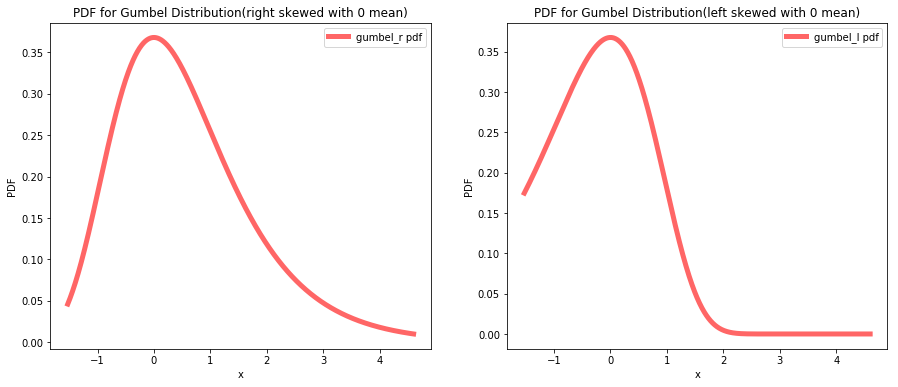

In [5]:
from scipy.stats import gumbel_r, gumbel_l

x = np.linspace(gumbel_r.ppf(0.01), gumbel_r.ppf(0.99), 1000)
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121)
ax.plot(x, gumbel_r.pdf(x), 'r-', lw=5, alpha=0.6, label='gumbel_r pdf')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.set_title('PDF for Gumbel Distribution(right skewed with 0 mean)')
ax.legend()

ax = fig.add_subplot(122)
ax.plot(x, gumbel_l.pdf(x), 'r-', lw=5, alpha=0.6, label='gumbel_l pdf')
ax.set_xlabel('x')
ax.set_ylabel('PDF')
ax.set_title('PDF for Gumbel Distribution(left skewed with 0 mean)')
ax.legend()

print("Random Variate: " +str(gumbel_r.rvs(loc=0, scale=1, size=0, random_state=None)))

### 6.3 PDFs 

The derivative of CDF is called a <b>Probability Density Function (PDF)</b>. The PDF does not represent probability, they represent probability density. Probability is the area beneath the PDF curve and hence can be computed by integration as follows:

$$P(\alpha \leq X \lt \beta) = \int_{\alpha}^{\beta}PDF_{X}(x)dx$$

or since the CDF is the integral of PDF,

$$P(\alpha \leq X \lt \beta) = CDF_{X}(\beta) - CDF_{X}(\alpha)$$

<b>Exercise 6.5:</b> What is the probability that a value chosen from an exponential distribution with parameter lambda falls between 1 and 20? Express your answer as a function of lambda.

In [6]:
from scipy.stats import expon

def calculate_probability_expon(x1, x2, l):
    return expon.cdf(x2, loc=1, scale=1.0/l) - expon.cdf(x1, loc=1, scale=1.0/l)

print(calculate_probability_expon(1, 20, 1))

0.9999999943972036


<b>Exercise 6.6:</b> In the BRFSS (see Section 4.5), the distribution of heights is roughly normal with parameters mean = 178 cm and variance = 59.4 cm for men, and mean = 163 cm and variance = 52.8 cm for women. In order to join Blue Man Group, you have to be male between 5’10” and 6’1”. What percentage of the U.S. male population is in this range?

In [7]:
from scipy.stats import norm
import math

norm = norm(loc=178, scale=math.sqrt(59.4))
prob = norm.cdf(185.42) - norm.cdf(177.8)
print("Percentage of male population in range: %.3f" % (prob * 100) + '%')

Percentage of male population in range: 34.251%


### 6.4 Convolution

Suppose X and Y are two random variables with their individual CDFs. A random variable Z is defined as Z = X+Y. The distribution of Z can be calculated as follows:

To start, assume that the particular value of X is x. Then,

$$P(Z<z \ | \ X=x) = P(Y \leq z-x)$$

$$P(Y \leq z-x) = CDF_{Y}(z-x)$$

As value of x is unknown, we need to integrate for the entire range of x
$$P(Z \leq z) = \int_{-\infty}^{infty}P(Z<z \ | \ X=x) \ PDF_{X}(x) \ dx$$
$$P(Z \leq z) = \int_{-\infty}^{infty}CDF_{Y}(z-x) \ PDF_{X}(x) \ dx$$

As the left side represents CDF of Z,
$$CDF_{Z}(z) = \int_{-\infty}^{infty}CDF_{Y}(z-x) \ PDF_{X}(x) \ dx$$

To find the PDF of Z, we can take the derivative w.r.t. z
$$PDF_{Z}(z) = \int_{-\infty}^{infty}PDF_{Y}(z-x) \ PDF_{X}(x) \ dx$$

Here the integral is convolution of the distributions and hence can be written as:

$$PDF_{Z} = PDF_{Y} \circledast PDF_{X}$$

<b>Exercise 6.7:</b> If X has an exponential distribution with parameter lambda, and Y has an Erlang distribution with parameters k and lambda, what is the distribution of the sum Z = X + Y?

<b>Solution:</b> As X is an exponential distribution and Y and Erlang distribution, they can be represented as:

$$PDF_{X} = \lambda e^{- \lambda x}$$

$$PDF_{Y} = \frac{\lambda^{k} y^{k-1} e^{-\lambda y}}{(k-1)!}$$

Hence,

$$PDF_{Z} = \frac{e^{-\lambda z} \lambda^{k+1}}{(k-1)!}\int_{-\infty}^{\infty} (z-x)^{k-1} dx$$

<b>Exercise 6.9:</b> If you are given PMF objects, you can compute the distribution of the new RV by enumerating all pairs of values. Write a function that computes the PMF of Z = max(X, Y).

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


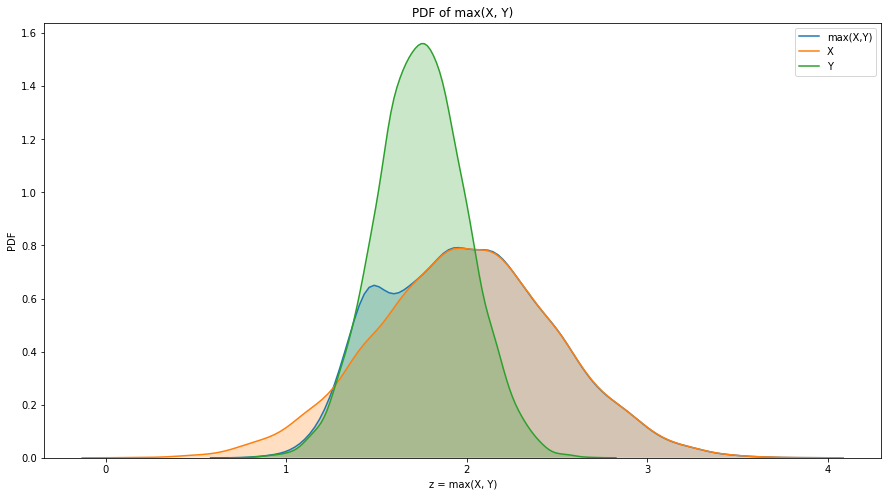

In [8]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x_norm = norm(loc=2, scale=0.5)
y_norm = norm(loc=1.75, scale=0.25)

xs = x_norm.rvs(size=10000)
ys = y_norm.rvs(size=10000)
xs = np.sort(xs)
ys = np.sort(ys)

zs = []
for idx, val in enumerate(xs):
    zs.append(max(xs[idx], ys[idx]))
    
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
sns.kdeplot(zs, shade=True, label='max(X,Y)')
sns.kdeplot(xs, shade=True, label='X')
sns.kdeplot(ys, shade=True, label='Y')
ax.set_xlabel('z = max(X, Y)')
ax.set_ylabel('PDF')
ax.set_title('PDF of max(X, Y)')
plt.show()


### 6.5 Why Normal? 

<b>Normal distribution is closed under linear transformation and convolution.</b> This means that for a distribution Y = aX + b, where X is a normal distribution with mean $\mu$ and standard deviation $\sigma$, the distribution of Y is given as:

$$Y \sim N(a\mu + b, \ a^{2}\sigma^{2})$$

Similary for the distribution Z = X + Y, where X and Y are normal distribution, the distribution of Z is given as:

$$Z \sim N(\mu_{X} + \mu_{Y}, \ \sigma_{X}^{2} + \sigma_{Y}^{2})$$

<b>Exercise 6.10:</b> If $X \sim N(\mu_{X}, \sigma_{X}^{2})$ and $Y \sim N(\mu_{Y}, \sigma_{y}^{2})$, what is the distribution of Z = aX + bY?

<b>Solution:</b> The distribution of Z is given as:
$$Z \sim N(a\mu_{X} + b\mu_{Y}, \ a^{2}\sigma_{X}^{2} + b^{2}\sigma_{Y}^{2})$$

<b>Exerciese 6.11:</b> Choose a pair of distributions (any two of exponential, normal, lognormal, and Pareto) and choose parameters that make their mean and variance similar. Generate random numbers from these distributions and compute the distribution of their sums.

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


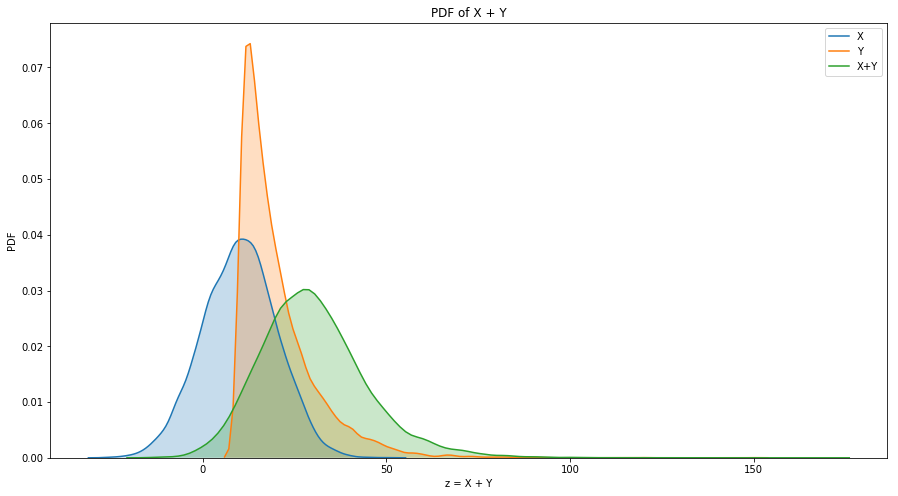

In [9]:
from scipy.stats import norm
from scipy.stats import expon
import math

mean = 10
std = 10

x_norm = norm(loc=mean, scale=std)
xs = x_norm.rvs(size=10000)
y_expon = expon(loc=mean, scale=std)
ys = y_expon.rvs(size=10000)

zs = []
for idx, val in enumerate(xs):
    zs.append(xs[idx] + ys[idx])
    
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
sns.kdeplot(xs, shade=True, label='X')
sns.kdeplot(ys, shade=True, label='Y')
sns.kdeplot(zs, shade=True, label='X+Y')
ax.set_xlabel('z = X + Y')
ax.set_ylabel('PDF')
ax.set_title('PDF of X + Y')
plt.show()

### 6.6 Central limit Theorem

<b>Central limit theorem</b> states that if we add large number of values from almost any distribution, the distribution of the sum converges to normal. More specifically, if the distribution of the values has mean and standard deviation $\mu$ and $\sigma$, the distribution of the sum is approximately $N(n\mu, \ n\sigma^{2})$. There are certain limitations to it which are stated as follows:

 - The values have to be drawn independently.
 - The values have to come from the same distribution (this can be relaxed).
 - The values have to be drawn from the distribution with finite mean and variance.
 - The number of values needed depends on the skewness of the distributions. Sums for exponential distribution converges for small sample size but for the lognormal distribution does not.
 
<b>Exercise 6.13:</b> Choose a distribution (one of exponential, lognormal or Pareto) and choose values for the parameter(s). Generate samples with sizes 2, 4, 8, etc., and compute the distribution of their sums. Use a normal probability plot to see if the distribution is approximately normal. How many terms do you have to add to see convergence?

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


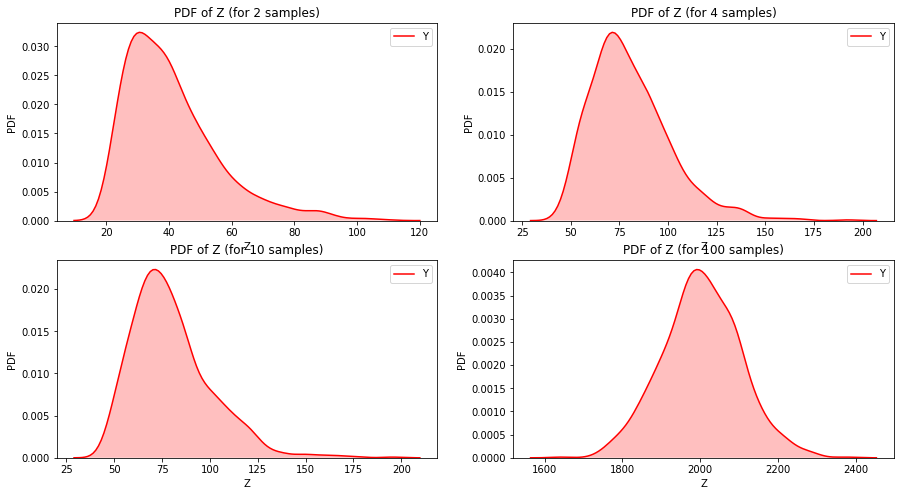

In [10]:
x_expon = expon(loc=10, scale=10)
count = 1000
y_2 = []
y_4 = []
y_10 = []
y_100 = []
for i in range(count):
    ys = x_expon.rvs(size=2) # 2 samples drawn randomly from the distribution
    y_2.append(np.sum(ys))
    ys = x_expon.rvs(size=4) # 4 samples drawn randomly from the distribution
    y_4.append(np.sum(ys))
    ys = x_expon.rvs(size=4) # 10 samples drawn randomly from the distribution
    y_10.append(np.sum(ys))
    ys = x_expon.rvs(size=100) # 8 samples drawn randomly from the distribution
    y_100.append(np.sum(ys))
    
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(221)
sns.kdeplot(y_2, shade=True, label='Y', color="r")
ax.set_xlabel('Z')
ax.set_ylabel('PDF')
ax.set_title('PDF of Z (for 2 samples)')

ax = fig.add_subplot(222)
sns.kdeplot(y_4, shade=True, label='Y', color="r")
ax.set_xlabel('Z')
ax.set_ylabel('PDF')
ax.set_title('PDF of Z (for 4 samples)')

ax = fig.add_subplot(223)
sns.kdeplot(y_10, shade=True, label='Y', color="r")
ax.set_xlabel('Z')
ax.set_ylabel('PDF')
ax.set_title('PDF of Z (for 10 samples)')

ax = fig.add_subplot(224)
sns.kdeplot(y_100, shade=True, label='Y', color="r")
ax.set_xlabel('Z')
ax.set_ylabel('PDF')
ax.set_title('PDF of Z (for 100 samples)')

plt.show()

<b>In a nut shell, to get PMF from CDF, differences in cumulative probabilities can be computed. A PDF is the derivative of continuous CDF or CDF is the integral of PDF. But PDF maps the values to probability densities. To get the probability, we need to integarte PDF.</b>